In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

mkpath("downloads")
mkpath("out")

using RCall

 Activating environment at `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Project.toml`


(copia di un Rmd in jupyter notebook)

saheart: dati su maschi di una regione ad alto rischio di malattie al cuore del sud africa

In [7]:
download("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data","downloads/SAheart.data")
R"""SAheart <- read.csv("downloads/SAheart.data")
""";

come prima cosa, modelliamo probabilità malattia coronaria cuore (chd=1) usando  
colesterolo a densita bassa di liboproteine (ldl)




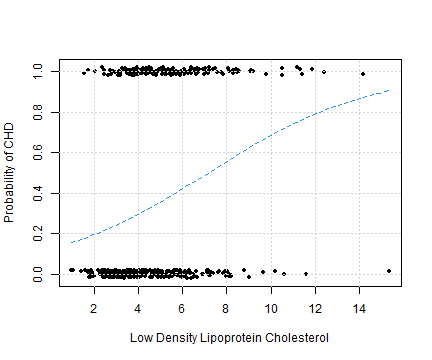

In [9]:
R"""chd_mod_ldl <- glm(chd ~ ldl, data = SAheart, family = binomial)
plot(jitter(chd, factor = 0.1) ~ ldl, data = SAheart, pch = 20,
ylab = "Probability of CHD", xlab = "Low Density Lipoprotein Cholesterol")
grid()
curve(predict(chd_mod_ldl, data.frame(ldl = x), type = "response"),
add = TRUE, col = "dodgerblue", lty = 2)
""";

come ci aspettavamo, il grafico indica che un alto tasso di colesterolo porta a un alta prob di chd  
facciamo ora un z test tramite fun summary


In [11]:
R"""
coef(summary(chd_mod_ldl))
"""

RObject{RealSxp}
              Estimate Std. Error   z value     Pr(>|z|)
(Intercept) -1.9686681 0.27307908 -7.209150 5.630207e-13
ldl          0.2746613 0.05163983  5.318787 1.044615e-07


valore p basso->rigettiamo ipotesi nulla, ldl è un predittore significativo  
vediamo a conf int 95%

In [12]:
R"""confint.default(chd_mod_ldl,level=0.95)
"""

RObject{RealSxp}
                 2.5 %     97.5 %
(Intercept) -2.5038933 -1.4334430
ldl          0.1734491  0.3758735


proviamo a fittare un modello contenente tutti i dati

In [13]:
R"chd_mod_additive <- glm(chd ~ sbp + tobacco + ldl + adiposity + famhist + 
    typea + obesity + alcohol + age, data = SAheart, family = binomial)
"

RObject{VecSxp}

Call:  glm(formula = chd ~ sbp + tobacco + ldl + adiposity + famhist + 
    typea + obesity + alcohol + age, family = binomial, data = SAheart)

Coefficients:
   (Intercept)             sbp         tobacco             ldl       adiposity  
    -6.1507209       0.0065040       0.0793764       0.1739239       0.0185866  
famhistPresent           typea         obesity         alcohol             age  
     0.9253704       0.0395950      -0.0629099       0.0001217       0.0452253  

Degrees of Freedom: 461 Total (i.e. Null);  452 Residual
Null Deviance:	    596.1 
Residual Deviance: 472.1 	AIC: 492.1


compariamo i due modelli usando Likeliohood Ratio Test

In [14]:
R"""anova(chd_mod_ldl, chd_mod_additive, test = "LRT")"""

RObject{VecSxp}
Analysis of Deviance Table

Model 1: chd ~ ldl
Model 2: chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + 
    alcohol + age
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1       460     564.28                          
2       452     472.14  8   92.139 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


deviance è il risultato del test  
p è basso quiondi preferiamo il modello più grande  
per trovare un modello intermedio migliore possiamoi fare stepwise aic o bic, che   
eran definiti in termini di verosimiglianza  

esempio con AIC

In [17]:
R"chd_mod_selected <- step(chd_mod_additive, trace = 1, k = 2)";

Start:  AIC=492.14
chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + 
    alcohol + age

            Df Deviance    AIC
- alcohol    1   472.14 490.14
- adiposity  1   472.55 490.55
- sbp        1   473.44 491.44
<none>           472.14 492.14
- obesity    1   474.23 492.23
- ldl        1   481.07 499.07
- tobacco    1   481.67 499.67
- typea      1   483.05 501.05
- age        1   486.53 504.53
- famhist    1   488.89 506.89

Step:  AIC=490.14
chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + 
    age

            Df Deviance    AIC
- adiposity  1   472.55 488.55
- sbp        1   473.47 489.47
<none>           472.14 490.14
- obesity    1   474.24 490.24
- ldl        1   481.15 497.15
- tobacco    1   482.06 498.06
- typea      1   483.06 499.06
- age        1   486.64 502.64
- famhist    1   488.99 504.99

Step:  AIC=488.55
chd ~ sbp + tobacco + ldl + famhist + typea + obesity + age

          Df Deviance    AIC
- sbp      1   473.98 487.98
<none> 

ritestiamo il modello ottenuto con i precedenti



In [25]:
@show R"""anova(chd_mod_additive, chd_mod_selected, test = "LRT")"""
R"""anova(chd_mod_ldl, chd_mod_selected, test = "LRT")"""

R"anova(chd_mod_additive, chd_mod_selected, test = \"LRT\")" = RObject{VecSxp}
Analysis of Deviance Table

Model 1: chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + 
    alcohol + age
Model 2: chd ~ tobacco + ldl + famhist + typea + age
  Resid. Df Resid. Dev Df Deviance Pr(>Chi)
1       452     472.14                     
2       456     475.69 -4  -3.5455    0.471



RObject{VecSxp}
Analysis of Deviance Table

Model 1: chd ~ ldl
Model 2: chd ~ tobacco + ldl + famhist + typea + age
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1       460     564.28                          
2       456     475.69  4   88.593 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


il modello selezionato sembrerebbe essere migliore